In [33]:
# Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [46]:
# Load data
companies_data = pd.read_csv("data/Top_1000_Companies_Dataset.csv")

In [25]:
# Convert 'growth_percentage' column to string type
companies_data['growth_percentage'] = companies_data['growth_percentage'].astype(str)

# Remove percentage symbols and convert to numeric
companies_data['growth_percentage'] = companies_data['growth_percentage'].str.rstrip('%').astype(float)

# Calculate the average growth percentage for each industry
average_growth_by_industry = companies_data.groupby('Industry')['growth_percentage'].mean()

# Identify the lowest 10 industries by average growth percentage
lowest_avg_growth = average_growth_by_industry.sort_values().head(10)
lowest_avg_growth

Industry
Warehousing                                      1.000000
Automation Machinery Manufacturing               3.000000
Printing                                         5.000000
Machinery                                        5.000000
Video                                            6.000000
Networking                                       6.000000
Casinos                                          7.666667
Furniture and Home Furnishings Manufacturing     8.000000
Babytech                                        12.666667
Retail                                          12.714286
Name: growth_percentage, dtype: float64

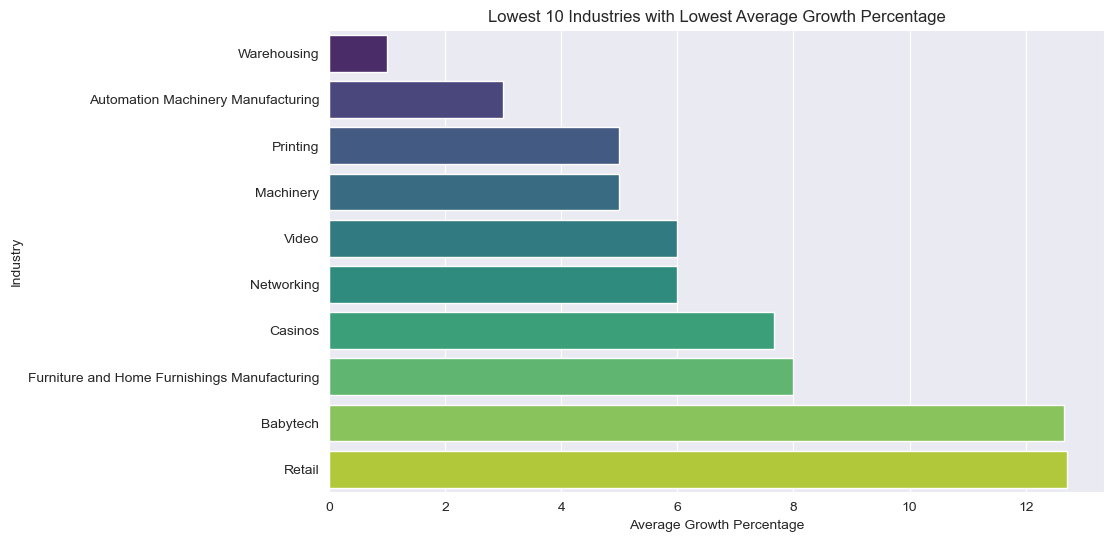

In [26]:
# Set up plot
plt.figure(figsize=(10, 6))
sns.barplot(x=lowest_avg_growth.values, y=lowest_avg_growth.index, palette='viridis')

# Add labels and title
plt.xlabel('Average Growth Percentage')
plt.ylabel('Industry')
plt.title('Lowest 10 Industries with Lowest Average Growth Percentage')

# Show the plot
plt.show()

In [27]:
# Define a growth percentage threshold for fastest-growing companies
growth_threshold = 100  # Example threshold

# Filter the dataset to include only fastest-growing companies
fastest_growing_companies = companies_data[companies_data['growth_percentage'] > growth_threshold]
fastest_growing_companies

,company_name,url,city,state,country,employees,linkedin_url,founded,Industry,GrowjoRanking,...,keywords,LeadInvestors,Accelerator,btype,valuation,total_funding,product_url,indeed_url,growth_percentage,contact_info
0,OpenAI,openai.com,San Francisco,CA,United States,655,http://www.linkedin.com/company/openai,2015.0,AI,1,...,"Artificial Intelligence, Online Gaming, Non Pr...","Thrive, Founders Fund",NaN,NaN,2.900000e+10,$11B,https://www.growjo.com/company/OpenAI,https://www.indeed.com/jobs?q=company%3A(OpenAI),118.0,For Contact Direct Phone Numbers and Emails se...
1,Alchemy,alchemy.com,San Francisco,CA,United States,201,http://www.linkedin.com/company/alchemyinc,NaN,Fintech,2,...,NaN,"Lightspeed, Silver Lake",NaN,NaN,1.020000e+10,$564M,https://www.growjo.com/company/Alchemy,https://www.indeed.com/jobs?q=company%3A(Alchemy),134.0,For Contact Direct Phone Numbers and Emails se...
8,Yuga Labs,yugalabs.io,Everywhere,Unknown,United States,177,http://www.linkedin.com/company/yuga-labs,NaN,Fintech,9,...,NaN,"Andreessen Horowitz, Thrive Capital, Sound Ven...",NaN,NaN,4.000000e+09,$450M,https://www.growjo.com/company/Yuga_Labs,https://www.indeed.com/jobs?q=company%3A(Yuga ...,101.0,For Contact Direct Phone Numbers and Emails se...
10,Anthropic,anthropic.com,San Francisco,CA,United States,131,http://www.linkedin.com/company/anthropicresearch,NaN,AI,11,...,NaN,NaN,NaN,NaN,4.400000e+09,$1.3B,https://www.growjo.com/company/Anthropic,https://www.indeed.com/jobs?q=company%3A(Anthr...,138.0,For Contact Direct Phone Numbers and Emails se...
14,Drata,drata.com,San Diego,CA,United States,427,http://www.linkedin.com/company/drata,2020.0,IT Security,15,...,saas,"Iconiq Growth, GGV",NaN,NaN,2.000000e+09,$128.2M,https://www.growjo.com/company/Drata,https://www.indeed.com/jobs?q=company%3A(Drata),111.0,For Contact Direct Phone Numbers and Emails se...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,Phoenix Engineering,phoenixen.com,Cologne,Unknown,Germany,93,http://www.linkedin.com/company/phoenixen,NaN,Telecom,988,...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.growjo.com/company/Phoenix_Enginee...,https://www.indeed.com/jobs?q=company%3A(Phoen...,304.0,For Contact Direct Phone Numbers and Emails se...
988,TransForce,transforce.com,Lincolnia,VA,United States,829,http://www.linkedin.com/company/transforce,1991.0,Transportation,989,...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.growjo.com/company/TransForce,https://www.indeed.com/jobs?q=company%3A(Trans...,399.0,For Contact Direct Phone Numbers and Emails se...
989,Kintentâ„¢ï¸,kintent.com,Boston,MA,United States,74,http://www.linkedin.com/company/bekintent,NaN,Tech Services,990,...,NaN,NaN,NaN,NaN,NaN,$17.1M,https://www.growjo.com/company/Kintentâ„¢ï¸,https://www.indeed.com/jobs?q=company%3A(Kinte...,147.0,For Contact Direct Phone Numbers and Emails se...
990,Emerline,emerline.com,Mountain View,CA,United States,577,http://www.linkedin.com/company/emerline,2011.0,Tech Services,991,...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.growjo.com/company/Emerline,https://www.indeed.com/jobs?q=company%3A(Emerl...,340.0,For Contact Direct Phone Numbers and Emails se...


In [32]:
# Create a copy of the DataFrame to avoid SettingWithCopyWarning
fastest_growing_companies_copy = fastest_growing_companies.copy()

# Convert non-string values in the 'keywords' column to strings using .loc indexer
fastest_growing_companies_copy.loc[:, 'keywords'] = fastest_growing_companies_copy['keywords'].astype(str)

# Calculate the top keywords associated with fastest-growing companies in different industries
top_keywords_by_industry = fastest_growing_companies_copy.groupby('Industry')['keywords'].apply(lambda x: ' '.join(x)).reset_index()
top_keywords_by_industry

,Industry,keywords
0,AI,"Artificial Intelligence, Online Gaming, Non Pr..."
1,Advertising,nan
2,Airlines and Aviation,nan nan
3,Analytics,"nan nan nan nan nan nan Analytics, Machine Lea..."
4,Automotive,nan nan
...,...,...
66,Trade,nan
67,Transportation,nan
68,Travel Arrangements,nan
69,Wireless,nan


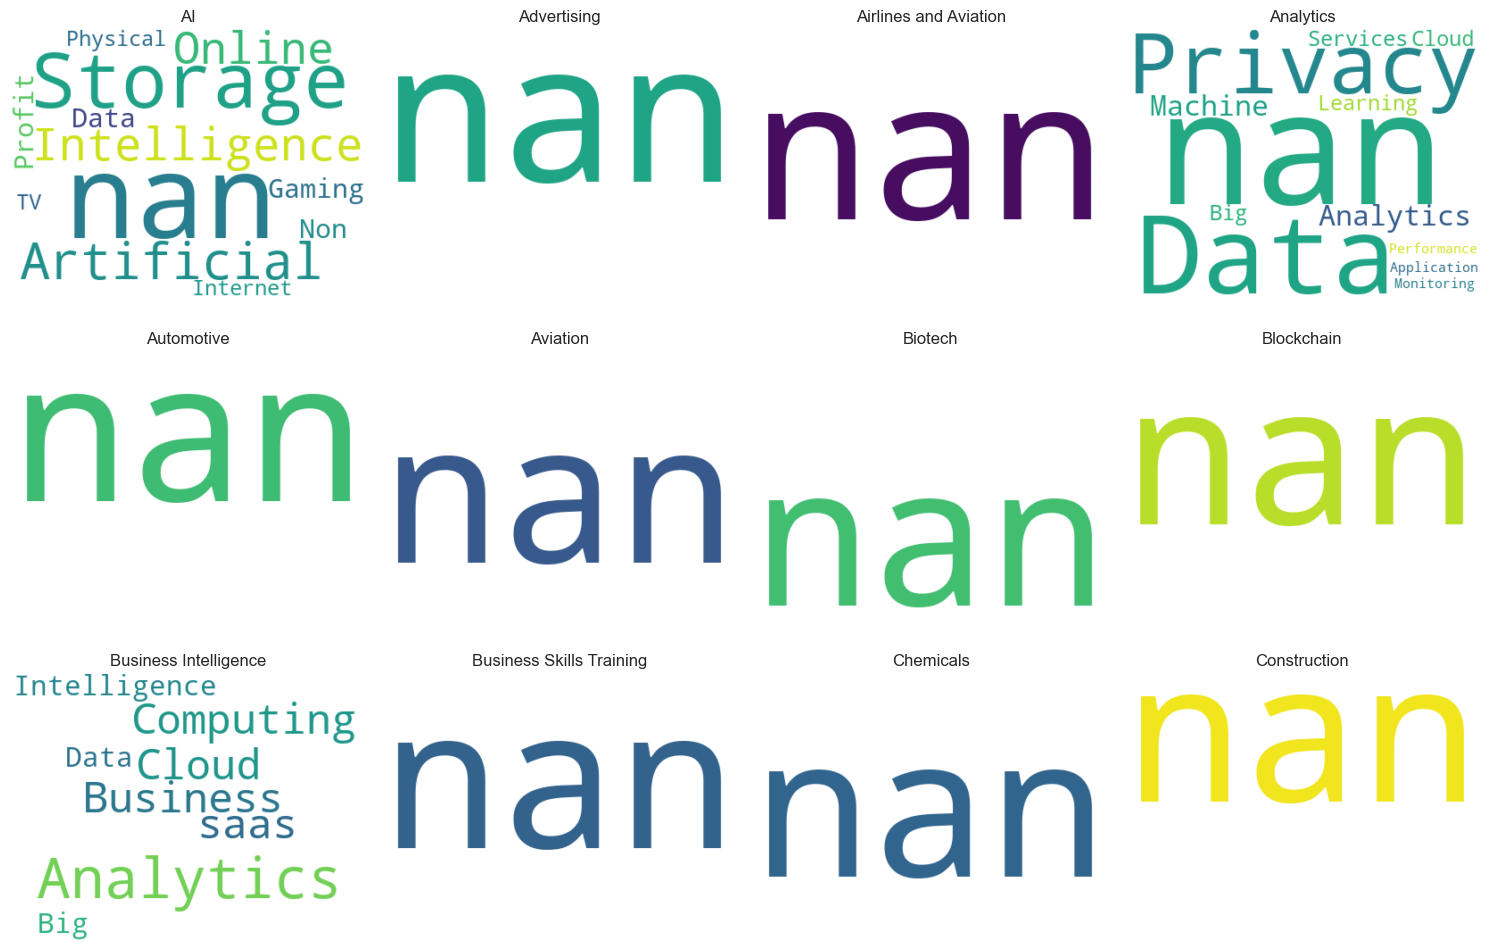

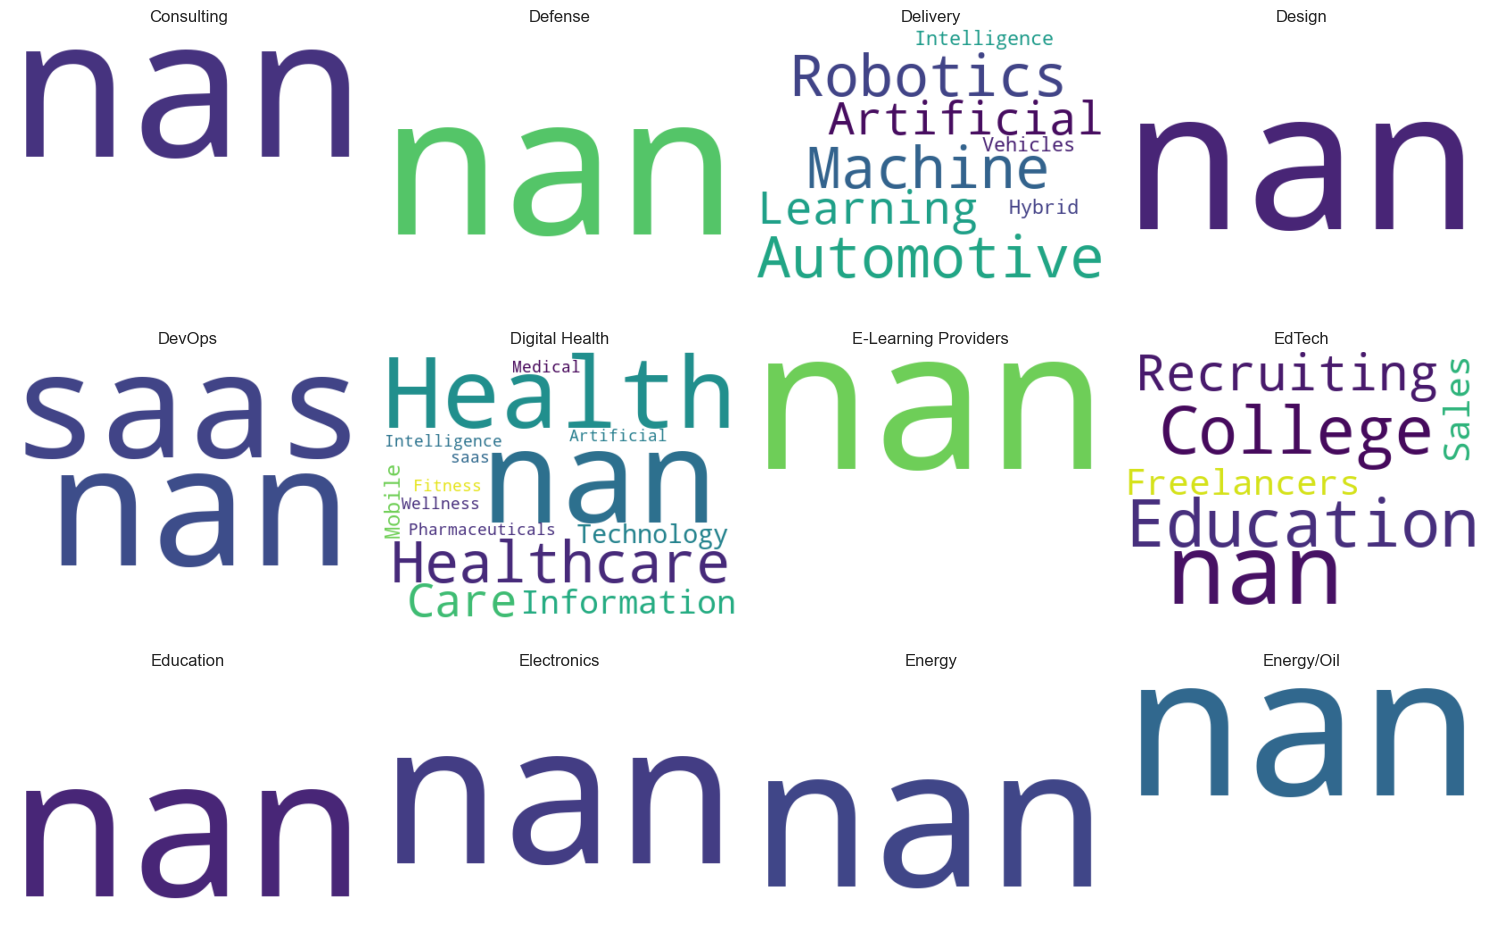

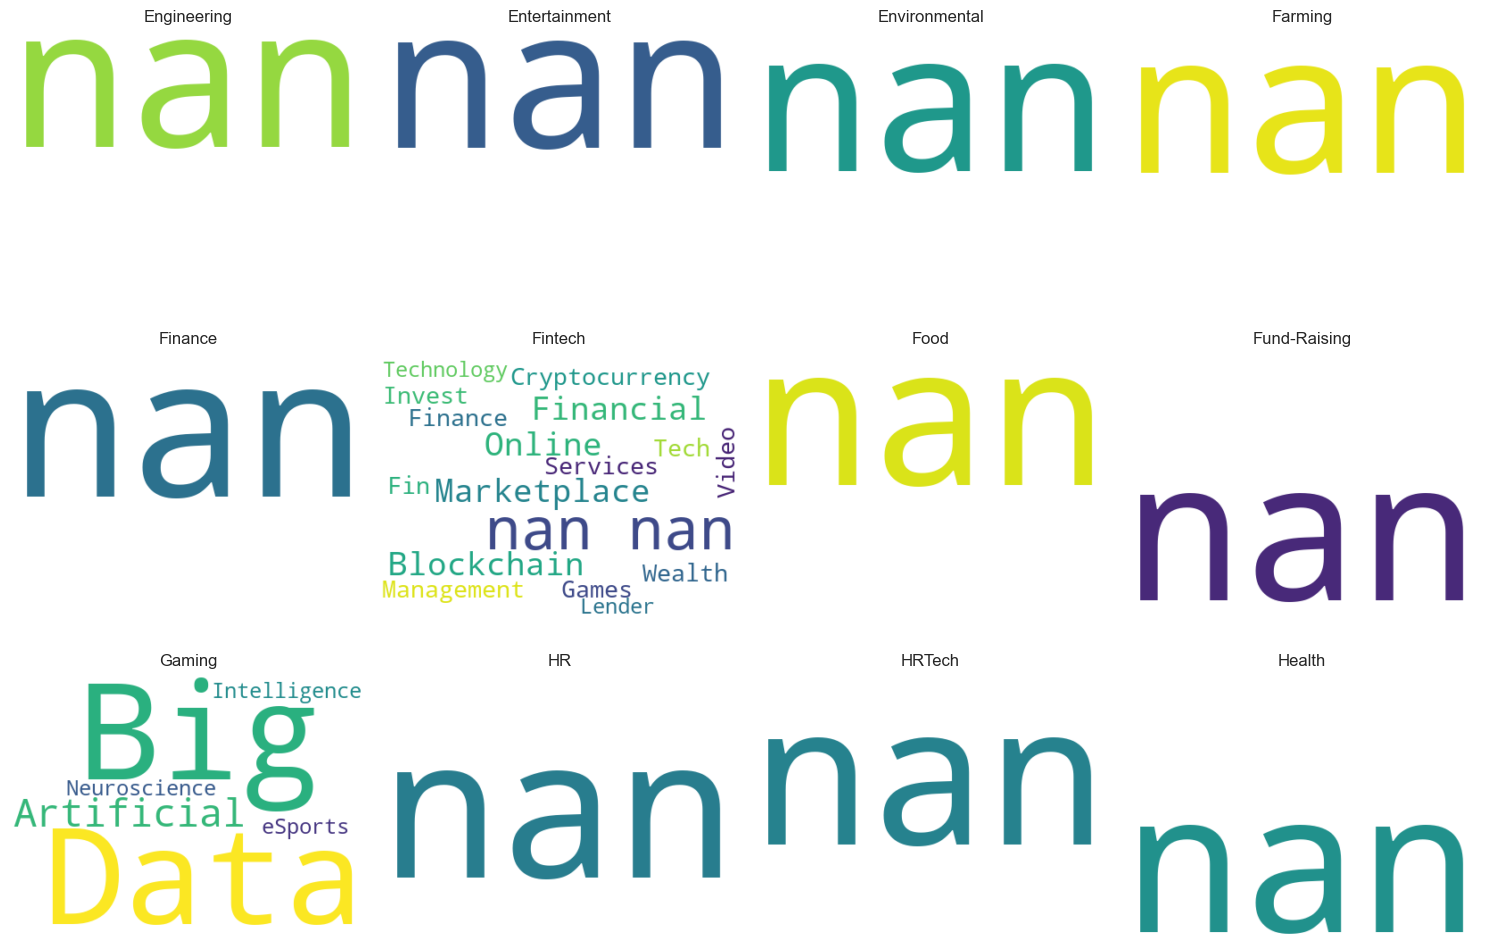

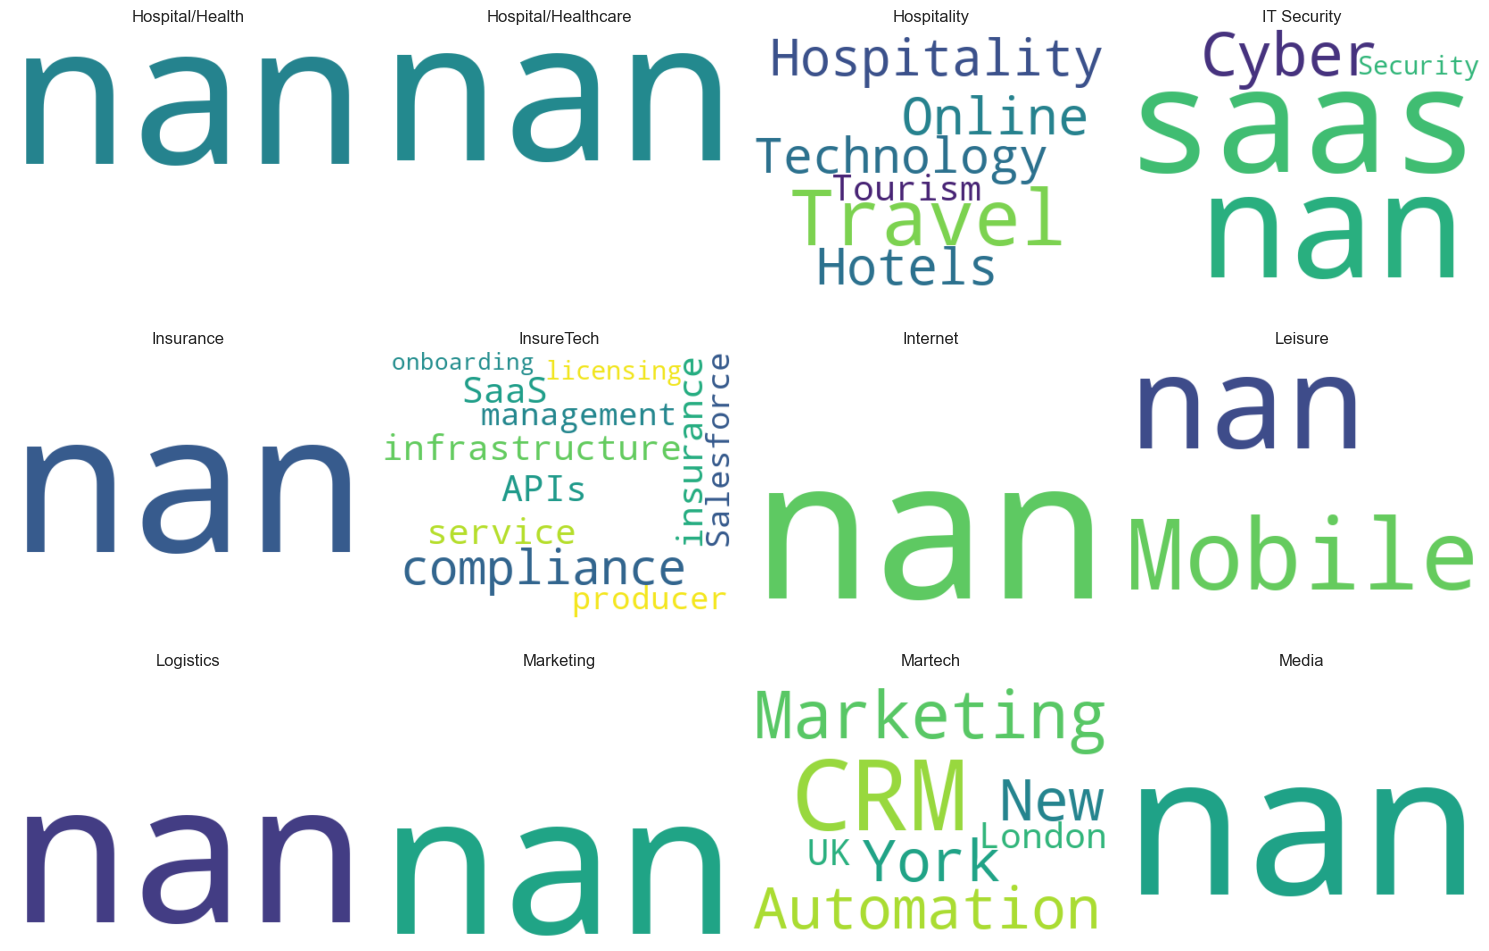

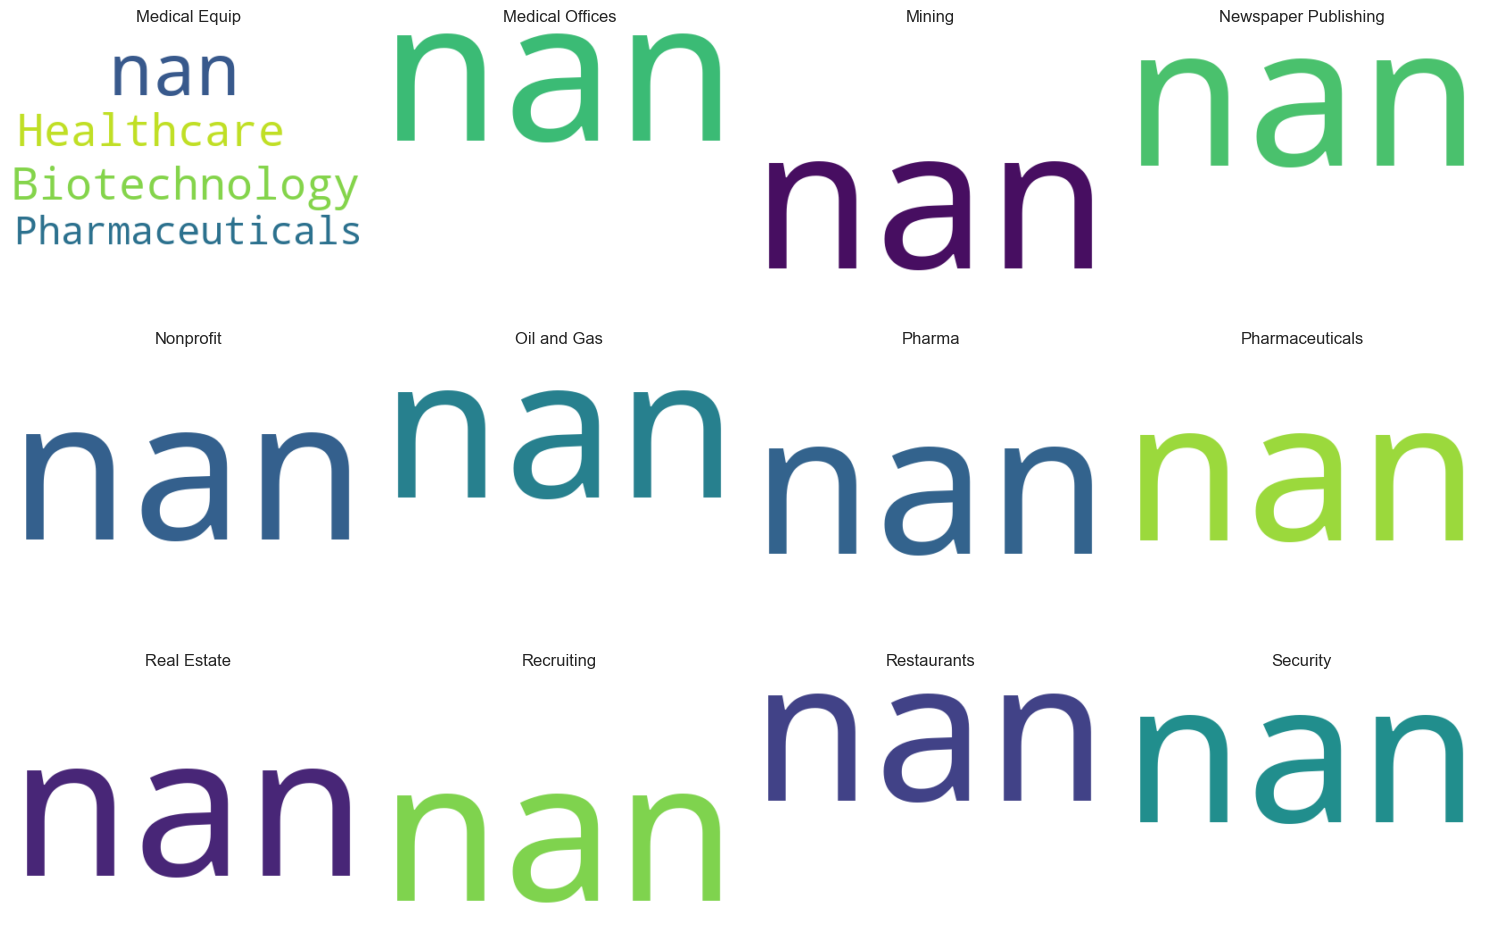

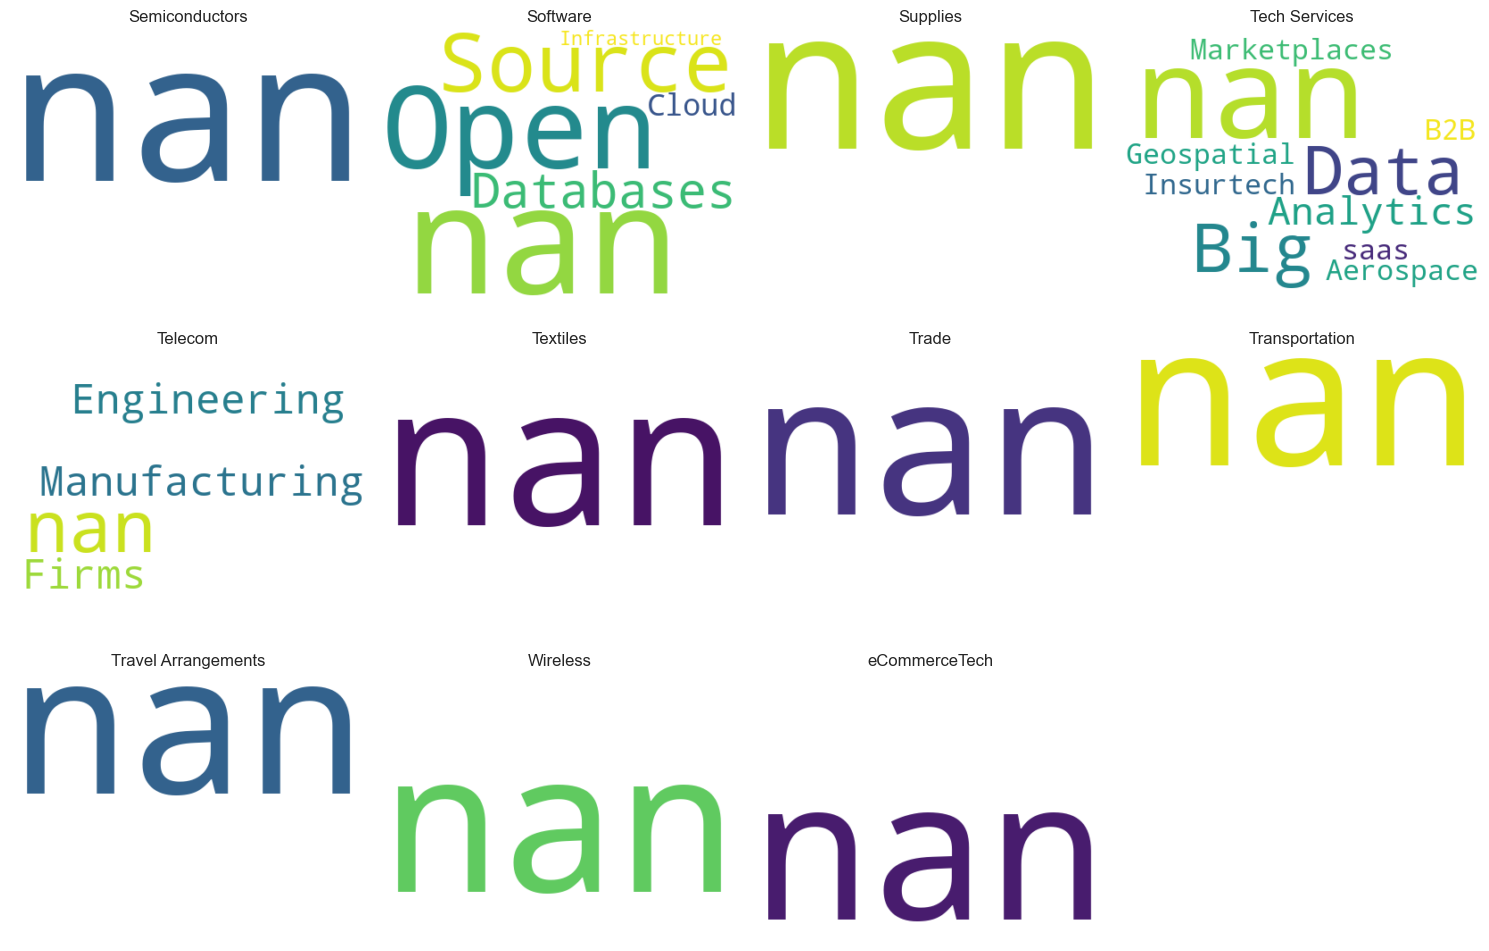

In [37]:
# Calculate the number of industries and determine how many figures are needed
num_industries = len(top_keywords_by_industry)
num_per_figure = 12  # Number of subplots per figure
num_figures = (num_industries - 1) // num_per_figure + 1

for fig_num in range(num_figures):
    plt.figure(figsize=(15, 10))  # Adjust the figure size as needed

    # Calculate the starting and ending index for the current figure
    start_index = fig_num * num_per_figure
    end_index = min((fig_num + 1) * num_per_figure, num_industries)

    # Generate word clouds for each industry in the current figure
    for index in range(start_index, end_index):
        row = top_keywords_by_industry.iloc[index]
        industry = row['Industry']
        keywords = row['keywords']

        # Generate word cloud for keywords
        wordcloud = WordCloud(width=400, height=300, background_color='white').generate(keywords)

        # Plot word cloud
        plt.subplot(3, 4, index - start_index + 1)  # 3 rows, 4 columns
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(industry)
        plt.axis('off')

    # Adjust layout and spacing for the current figure
    plt.tight_layout()
    plt.show()

In [38]:
# Calculate the average growth percentage for companies with lead investors or accelerators
avg_growth_with_investors = companies_data[companies_data['LeadInvestors'].notnull() | companies_data['Accelerator'].notnull()]['growth_percentage'].mean()

# Calculate the average growth percentage for companies without lead investors or accelerators
avg_growth_without_investors = companies_data[companies_data['LeadInvestors'].isnull() & companies_data['Accelerator'].isnull()]['growth_percentage'].mean()

# Display the average growth percentages for comparison
print("Average Growth with Investors/Accelerators:", avg_growth_with_investors)
print("Average Growth without Investors/Accelerators:", avg_growth_without_investors)

Average Growth with Investors/Accelerators: 51.59058823529412
Average Growth without Investors/Accelerators: 145.94086956521738


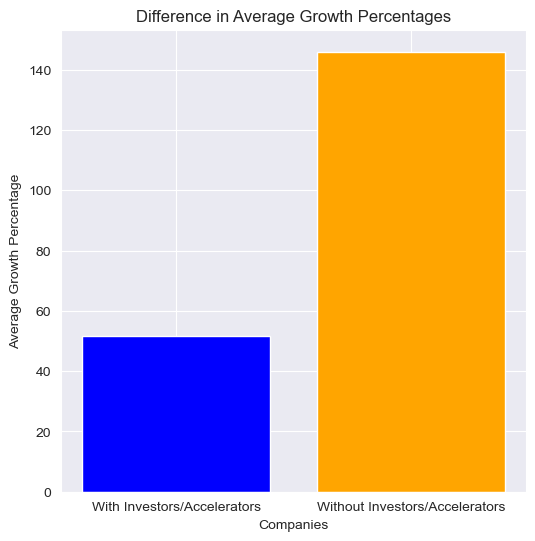

In [39]:
# Set up plot
plt.figure(figsize=(6, 6))
plt.bar(['With Investors/Accelerators', 'Without Investors/Accelerators'], [avg_growth_with_investors, avg_growth_without_investors], color=['blue', 'orange'])

# Add labels and title
plt.xlabel('Companies')
plt.ylabel('Average Growth Percentage')
plt.title('Difference in Average Growth Percentages')

# Show the plot
plt.show()